(16404, 21)
(16404,)
Index(['CustomerID', 'FirstName', 'LastName', 'AddressLine1', 'City',
       'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber',
       'BirthDate', 'Education', 'Occupation', 'Gender', 'MaritalStatus',
       'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'AveMonthSpend', 'BikeBuyer'],
      dtype='object')

For column CountryRegionName
United States     6935
Australia         3194
United Kingdom    1709
France            1591
Germany           1577
Canada            1398
Name: CountryRegionName, dtype: int64

For column Education
Bachelors              4758
Partial College        4451
High School            2944
Graduate Degree        2851
Partial High School    1400
Name: Education, dtype: int64

For column Occupation
Professional      4922
Skilled Manual    4038
Management        2718
Clerical          2597
Manual            2129
Name: Occupation, dtype: int64

For column Gender
M    8290
F

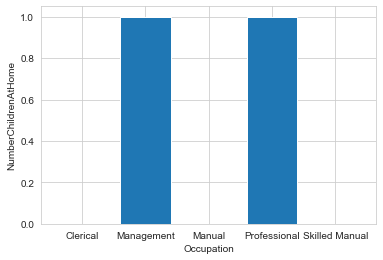

   NumberCarsOwned  NumberChildrenAtHome
0                0                     0
1                1                     0
2                2                     0
3                3                     3
4                4                     4


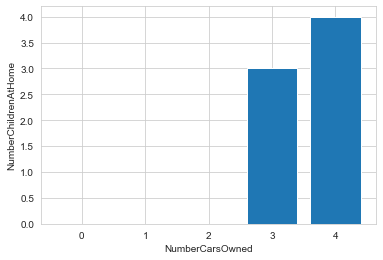

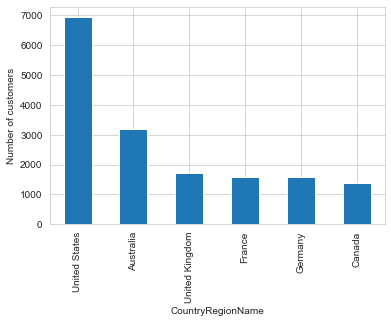

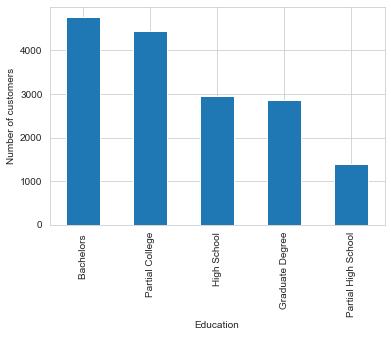

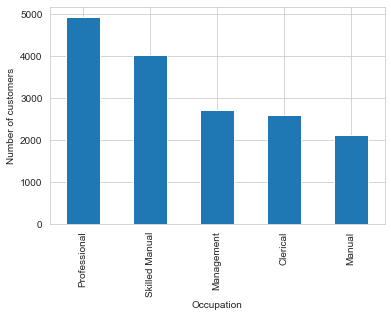

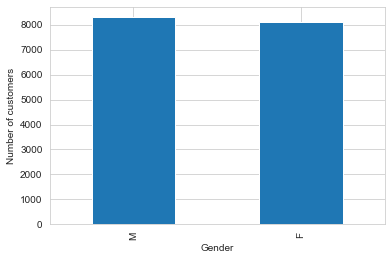

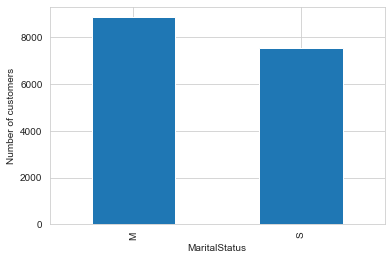

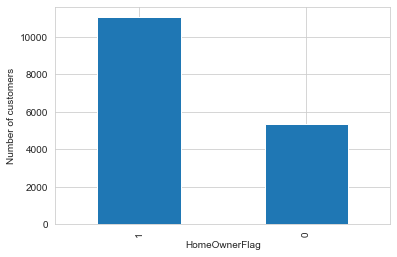

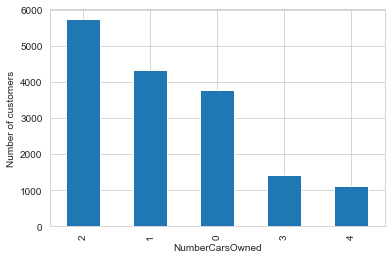

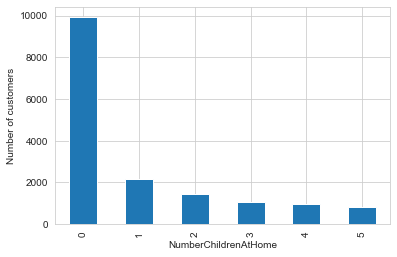

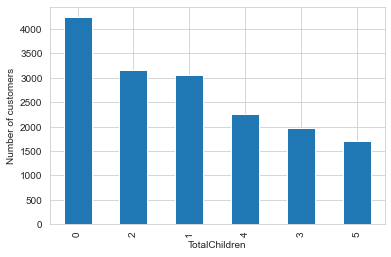

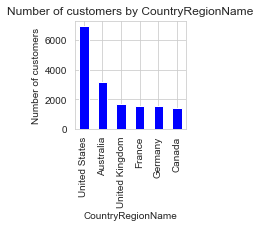

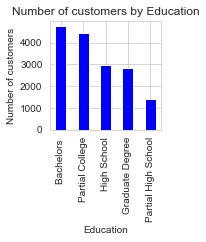

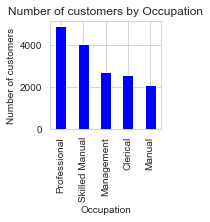

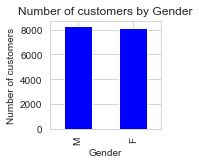

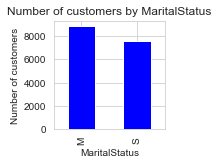

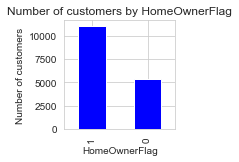

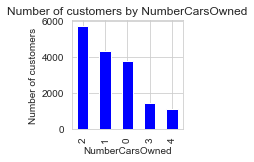

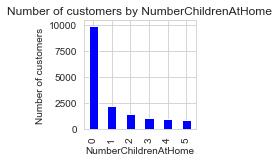

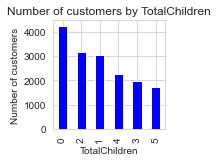

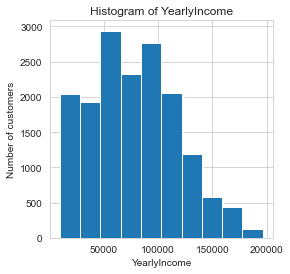

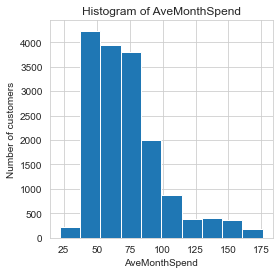

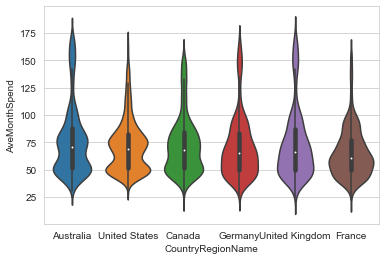

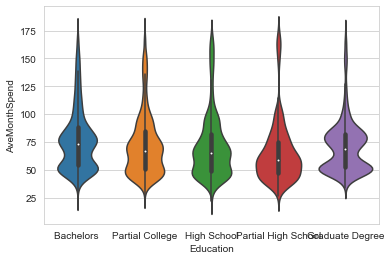

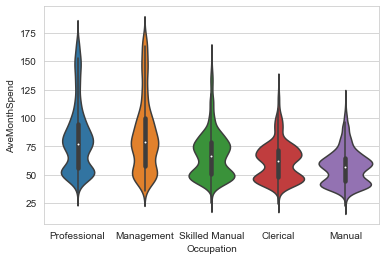

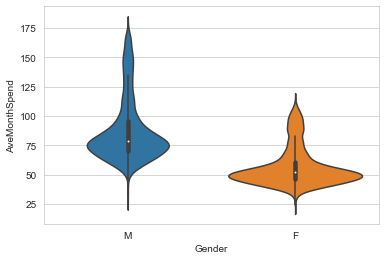

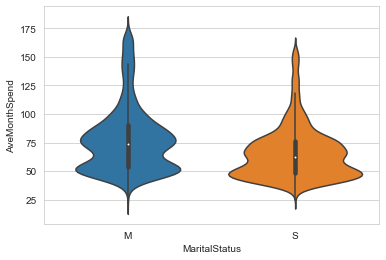

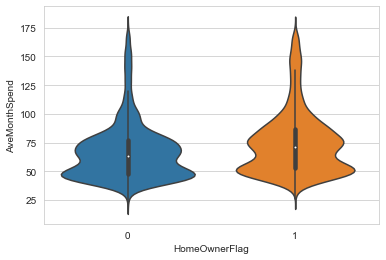

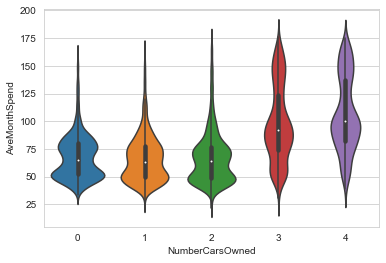

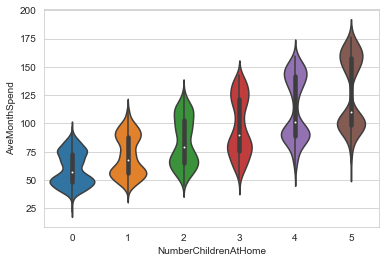

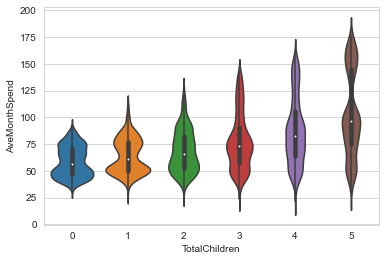

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


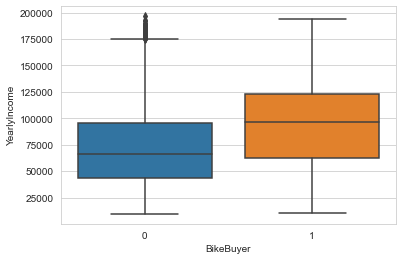

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


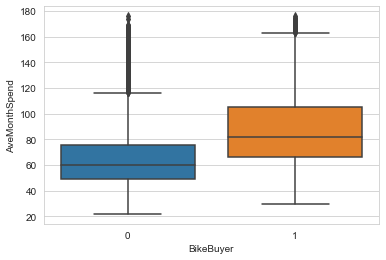

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from datetime import datetime, date

%matplotlib inline

AW_data = pd.read_csv('AdvWorksCusts.csv')
AW_avemonth = pd.read_csv('AW_AveMonthSpend.csv')
AW_bikebuyer = pd.read_csv('AW_BikeBuyer.csv')
AW_data['AveMonthSpend'] = AW_avemonth['AveMonthSpend']
AW_data['BikeBuyer'] = AW_bikebuyer['BikeBuyer']
AW_test = pd.read_csv('AW_test.csv')
AW_data.head(10)

AW_data.dtypes

AW_data.columns
AW_data.shape
AW_data.isnull().sum()


AW_data.drop(['Title','MiddleName', 'Suffix', 'AddressLine2'], axis = 1, inplace = True)
AW_data.head(10)

AW_data.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
print(AW_data.shape)
print(AW_data.CustomerID.unique().shape)

print(AW_data.columns)


AW_data.describe()

def count_unique(data, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(data[col].value_counts())
cat_cols = ['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren']
count_unique(AW_data, cat_cols)

counts = AW_data.groupby(["Occupation"], as_index = False)['NumberChildrenAtHome'].median()
print(counts)
temp = np.array([counts['Occupation'],counts['NumberChildrenAtHome']])
plt.bar(temp[0], temp[1])
plt.xlabel('Occupation')
plt.ylabel('NumberChildrenAtHome')
plt.show()


counts = AW_data.groupby(["NumberCarsOwned"], as_index = False)['NumberChildrenAtHome'].median()
print(counts)
temp = np.array([counts['NumberCarsOwned'],counts['NumberChildrenAtHome']])
plt.bar(temp[0], temp[1])
plt.xlabel('NumberCarsOwned')
plt.ylabel('NumberChildrenAtHome')
plt.show()

def plot_bars(data, cols):
    for col in cols:
        fig = plt.figure() 
        ax = fig.gca() 
        counts = data[col].value_counts() 
        counts.plot.bar(ax = ax)
        ax.set_xlabel(col) 
        ax.set_ylabel('Number of customers')
        plt.show()
plot_bars(AW_data, cat_cols)

def plot_bars(data, cols):
    for col in cols:
        fig = plt.figure(figsize=(2,2)) 
        ax = fig.gca()    
        counts = data[col].value_counts() 
        counts.plot.bar(ax = ax, color = 'blue')
        ax.set_title('Number of customers by ' + col) 
        ax.set_xlabel(col) 
        ax.set_ylabel('Number of customers')
        plt.show()
plot_bars(AW_data, cat_cols)

inc_cols = ['YearlyIncome','AveMonthSpend']

def plot_histogram(data, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(4,4)) 
        ax = fig.gca()     
        data[col].plot.hist(ax = ax, bins = bins) 
        ax.set_title('Histogram of ' + col) 
        ax.set_xlabel(col) 
        ax.set_ylabel('Number of customers')
        plt.show()
plot_histogram(AW_data, inc_cols)



def plot_violin(data, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.violinplot(x = col, y = col_y, data=data)
        plt.xlabel(col) 
        plt.ylabel(col_y)
        plt.show()
plot_violin(AW_data, cat_cols)

def plot_box(data, cols, col_x = 'BikeBuyer'):
    for col in cols:
        sns.boxplot(col_x, col, data=data)
        plt.xlabel(col_x) 
        plt.ylabel(col)
        plt.show()

plot_box(AW_data, inc_cols)

# REGRESSION MODEL

In [32]:
from sklearn import preprocessing
import scipy.stats as ss
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
